# Basic workflows

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob(verbose=True)
print(job)

>>> job.configs:
{}


## Load a proxy database

In [3]:
job.load_proxydb('./data/pages2k_dataset.pkl', verbose=True)

>>> job.configs["proxydb_path"] = ./data/pages2k_dataset.pkl
>>> 692 records loaded
>>> job.proxydb created


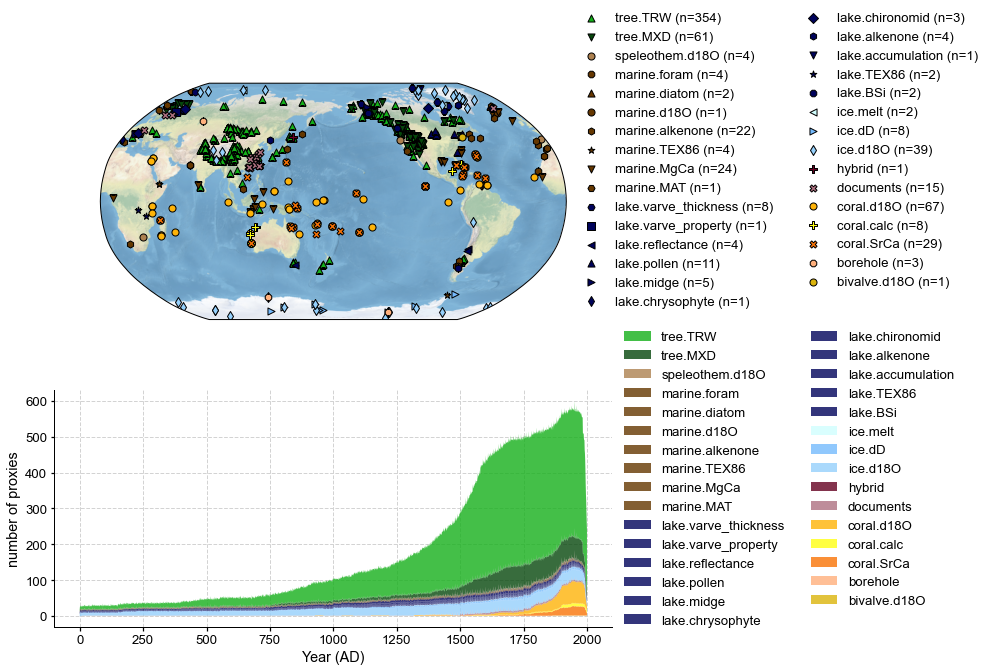

In [5]:
fig, ax = job.proxydb.plot()

## Filter a proxy database

In [6]:
job.filter_proxydb(by='ptype', keys=['coral'], verbose=True)

>>> 104 records remaining
>>> job.proxydb updated


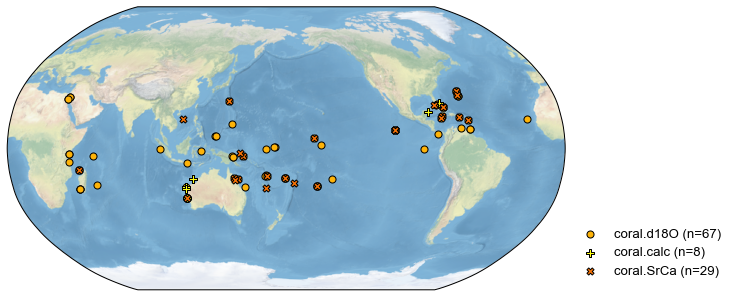

In [7]:
fig, ax = job.proxydb.plot(plot_count=False)

## Annualize/seasonalize the proxy database

In [8]:
job.annualize_proxydb(months=[6, 7, 8], verbose=True)

Annualizing ProxyRecord: 100%|██████████| 104/104 [00:02<00:00, 44.58it/s]

>>> 60 records remaining
>>> job.proxydb updated


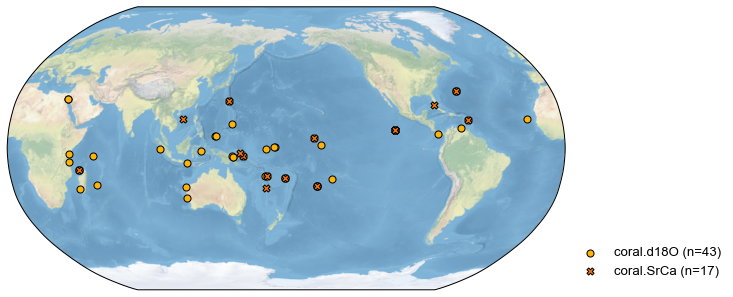

In [9]:
fig, ax = job.proxydb.plot(plot_count=False)

## Load climate modoel priors

In [5]:
job.load_gridded(
    tag='prior',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
        'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc', 'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.prior created


## Load instrumental observations

In [7]:
job.load_gridded(
    tag='obs',
    path_dict={
        'tas': './data/gistemp1200_ERSSTv4.nc',
        'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc',
    },
    rename_dict={'tas': 'tempanomaly', 'pr': 'precip'},
    center_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc', 'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}
>>> instrumental observation variables ['tas', 'pr'] loaded
>>> job.obs created


In [12]:
job.obs['tas'].da

<xarray.DataArray 'tas' (time: 1648, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ],
        [ 1.56      ,  1.56      ,  1.56      , ...,  1.56      ,
          1.56      ,  1.56      ]],

       [[-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        [-1.0299653 , -1.0299653 , -1.0299653 , ..., -1.0299653 ,
         -1.0299653 , -1.0299653 ],
        ...,
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998],
        [-0.29999998, -0.29999998, -0.29999998, ..., -0.29999998,
         -0.29999998, -0.29999998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2017-04-15

In [8]:
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'}}

## Calibrate the PSMs

In [13]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.SrCa': 'Linear',
}
ptype_season_dict = {
    'coral.d18O': [6, 7, 8],
    'coral.SrCa': [6, 7, 8],
}
job.calib_psms(ptype_psm_dict=ptype_psm_dict, ptype_season_dict=ptype_season_dict, verbose=True)

>>> job.configs["ptype_psm_dict"] = {'coral.d18O': 'Linear', 'coral.SrCa': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.d18O': [6, 7, 8], 'coral.SrCa': [6, 7, 8]}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs::  57%|█████▋    | 34/60 [00:01<00:01, 24.33it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:: 100%|██████████| 60/60 [00:02<00:00, 22.68it/s]

The PSM for Ocn_138 failed to calibrate.
>>> job.psm created for 59 records
>>> job.proxydb_bak created
>>> job.proxydb updated


In [14]:
print(job.proxydb_bak.nrec)
print(job.proxydb.nrec)

60
59


## Forward the PSMs

In [18]:
job.forward_psms(verbose=True)

Forwarding the PSMs:: 100%|██████████| 59/59 [00:10<00:00,  5.76it/s]

>>> job.ppdb created for 59 records


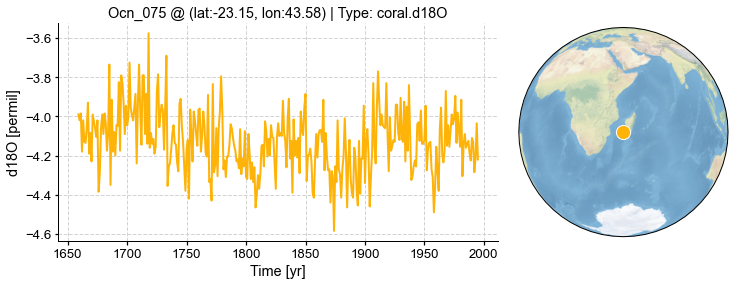

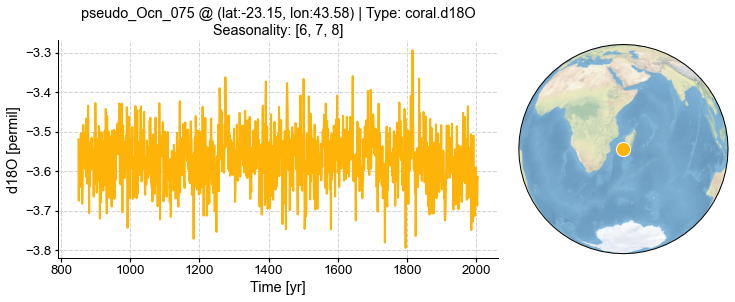

In [22]:
pid = 'Ocn_075'
fig, ax = job.proxydb.records[pid].plot()
fig, ax = job.ppdb.records[f'pseudo_{pid}'].plot()

## Annualize/seasonalize the climate model prior

In [23]:
job.annualize_ds(tag='prior', verbose=True, months=[6, 7, 8])

>>> Processing tas ...
>>> Processing pr ...
>>> job.prior updated


In [24]:
prior_bak = job.prior.copy()

(<Figure size 720x576 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'tas, 2005-8'}>)

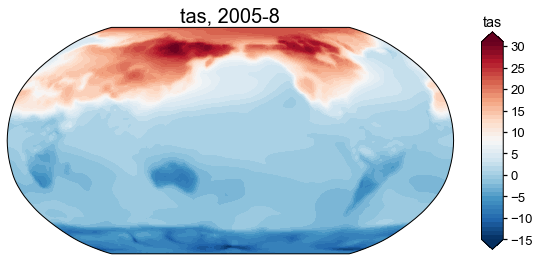

In [25]:
job.prior['tas'].plot(it=-1)

In [29]:
job.prior = prior_bak.copy()
job.regrid_ds(tag='prior', nlat=42, nlon=63, verbose=True)

>>> Processing tas ...
>>> Processing pr ...


In [30]:
job.prior['tas'].da

<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

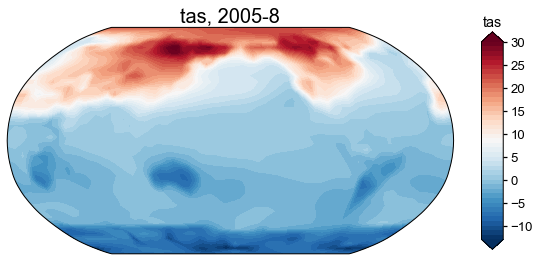

In [31]:
fig, ax = job.prior['tas'].plot(-1)

## Saving the `job` object

In [32]:
job.save(job_dirpath='./data/exp_test', verbose=True)

>>> job.configs["job_dirpath"] = ./data/exp_test
>>> job saved to: ./data/exp_test


In [33]:
import pandas as pd
job = pd.read_pickle('./data/exp_test/job.pkl')
job.configs

{'proxydb_path': './data/pages2k_dataset.pkl',
 'prior_path': {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
  'pr': './data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc',
  'pr': './data/GPCC_precip.mon.flux.1x1.v6.nc'},
 'ptype_psm_dict': {'coral.d18O': 'Linear', 'coral.SrCa': 'Linear'},
 'ptype_season_dict': {'coral.d18O': [6, 7, 8], 'coral.SrCa': [6, 7, 8]},
 'job_dirpath': './data/exp_test'}

In [35]:
job.prior['tas'].da

<xarray.DataArray 'tas' (time: 1156, lat: 42, lon: 63)>
array([[[ -7.47643518,  -7.51106125,  -7.60682241, ...,  -7.61908068,
          -7.52936638,  -7.47643518],
        [ -9.42977243,  -9.21364785,  -8.86146122, ...,  -9.45751958,
          -9.48816517,  -9.42977243],
        [-11.21933535, -11.02493929, -10.24814865, ..., -11.40715016,
         -11.32899803, -11.21933535],
        ...,
        [ 14.3567651 ,  13.71429314,  13.64500353, ...,  15.90731181,
          15.31555513,  14.3567651 ],
        [ 17.63995069,  17.4853255 ,  17.30944453, ...,  18.25940938,
          17.91855767,  17.63995069],
        [ 18.94141579,  18.93667196,  18.92585822, ...,  18.96997372,
          18.95361359,  18.94141579]],

       [[ -8.11308289,  -8.14893049,  -8.24326463, ...,  -8.25515156,
          -8.16677331,  -8.11308289],
        [ -9.96100292,  -9.97281143,  -9.79959508, ...,  -9.5524724 ,
          -9.80851089,  -9.96100292],
        [ -9.46036908,  -9.92644796, -10.13992205, ...,  -8.78133766,
          -8.99808642,  -9.46036908],
...
        [ 14.53631427,  13.66631166,  13.66456364, ...,  16.23888786,
          15.70978998,  14.53631427],
        [ 17.16435759,  17.05403509,  17.00732885, ...,  17.63017439,
          17.36501944,  17.16435759],
        [ 18.12553978,  18.13750532,  18.13620346, ...,  18.13540176,
          18.12712891,  18.12553978]],

       [[ -8.02508545,  -8.05244784,  -8.15332905, ...,  -8.16716757,
          -8.07882773,  -8.02508545],
        [ -9.49518864,  -9.16392655,  -8.74296983, ...,  -9.76262733,
          -9.68813762,  -9.49518864],
        [-11.93293941, -11.32976721, -10.41667034, ..., -12.37823061,
         -12.1428479 , -11.93293941],
        ...,
        [ 15.14224109,  14.13358768,  14.08309544, ...,  17.36154388,
          16.55513144,  15.14224109],
        [ 19.38425552,  19.14868929,  18.96859062, ...,  20.08208032,
          19.72616568,  19.38425552],
        [ 21.30426979,  21.3106148 ,  21.30226732, ...,  21.32455081,
          21.31077791,  21.30426979]]])
Coordinates:
  * time     (time) object 0850-08-31 00:00:00 ... 2005-08-31 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

## Data assimilation